In [12]:
import geopy.distance

def get_distance(location_1, location_2):

    distance = geopy.distance.distance(location_1, location_2).km

    return distance

In [19]:
location_1 = (18, 73) #pune
location_2 = (21, 79) #nagpure

In [20]:
get_distance(location_1, location_2)

711.9143858986774

In [17]:
def get_price_per_km(hour):

    if (hour > 8) & (hour < 11):
        price_per_km = 20
    elif (hour > 18) & (hour < 21):
        price_per_km = 15
    else:
        price_per_km = 10

    return price_per_km

In [21]:
get_price_per_km(19)

15

In [13]:
def get_final_price(pick_up_location, drop_location, booking_hour):

    total_distance = get_distance(pick_up_location, drop_location)
    actual_price_per_km = get_price_per_km(booking_hour)

    final_price = round(total_distance * actual_price_per_km, 2)

    return final_price


In [14]:
pick_up_location = (18, 73) #pune
drop_location = (21, 79) #nagpure
booking_time = 19 # 15

In [18]:
get_final_price(pick_up_location, drop_location, booking_time)

10678.72

#Uber's simplified pricing model

When you request an Uber, you enter your pick-up location and the destination. Based on the distance, peak hours, willingness to pay and many other factors, Uber uses a machine learning algorithm to compute what prices will be shown to you.

Let's consider a simplistic version of the Uber Pricing Model where you compute the price based on the distance between the pick-up and the drop location and the time of the booking.

User Inputs:

Pick-up location (pick_up_latitude, pick_up_longitude)

Drop location (drop_latitude, drop_longitude)

Time of booking

Output:

Final Price

In [22]:
pip install qrcode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.6 MB/s eta 0:00:00


In [23]:
pip install pillow

In [24]:
import geopy.distance
import qrcode
from IPython.display import Image, display

def get_distance(location_1, location_2):
    return geopy.distance.distance(location_1, location_2).km

def get_price_per_km(hour):
    if 8 < hour < 11:
        return 20
    elif 18 < hour < 21:
        return 15
    else:
        return 10

def get_final_price(pick_up_location, drop_location, booking_hour):
    distance = get_distance(pick_up_location, drop_location)
    price_per_km = get_price_per_km(booking_hour)
    return round(distance * price_per_km, 2)

def generate_upi_qr(upi_id, payee_name, amount, filename="payment_qr.png"):
    upi_link = f"upi://pay?pa={upi_id}&pn={payee_name}&am={amount}&cu=INR"
    qr = qrcode.make(upi_link)
    qr.save(filename)
    return filename

Pickup latitude: 21
Pickup longitude: 72
Drop latitude: 18
Drop longitude: 79

🧾 Total fare: ₹8062.23

Enter UPI ID (e.g., yourname@bank): 8275355816@ybl
Enter payee name: sagar

✅ UPI QR Code generated for ₹8062.23 and saved as 'payment_qr.png'


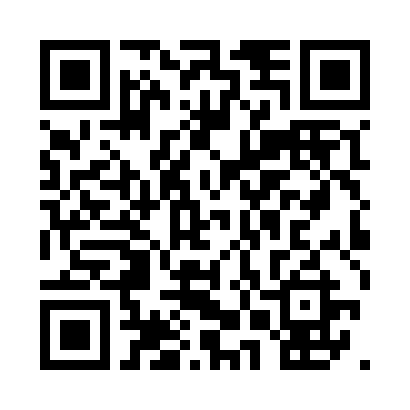

In [27]:
lat1 = float(input("Pickup latitude: "))
lon1 = float(input("Pickup longitude: "))
lat2 = float(input("Drop latitude: "))
lon2 = float(input("Drop longitude: "))
hour = int(input("Booking hour (0–23): "))

price = get_final_price((lat1, lon1), (lat2, lon2), hour)
print(f"\n🧾 Total fare: ₹{price}")

upi_id = input("\nEnter UPI ID (e.g., yourname@bank): ")
name = input("Enter payee name: ")

qr_file = generate_upi_qr(upi_id, name, price)
print(f"\n✅ UPI QR Code generated for ₹{price} and saved as '{qr_file}'")

display(Image(filename=qr_file))